In [228]:
import pandas as pd
pd.set_option('display.max_rows', None)
from datetime import datetime as dt
import os
import re
import xlrd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') # For plots
import numpy as np
from scipy import interpolate
import statsmodels
import sklearn
import calendar
import holidays
import tensorflow as tf
from fbprophet import Prophet
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [229]:
path_git = 'https://raw.githubusercontent.com/danc248/data_science_lab_2021_final_project/main/pod_u1_u6_complete_time_series.csv'

In [230]:
file_csv1 = pd.read_csv(path_git,sep=';')
file_csv1['date']=pd.to_datetime(file_csv1['date'])
file_csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210432 entries, 0 to 210431
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   date                                  210432 non-null  datetime64[ns]
 1   POD                                   210432 non-null  object        
 2   FL_ORA_LEGALE                         207528 non-null  float64       
 3   CONSUMO_ATTIVA_PRELEVATA              207528 non-null  float64       
 4   CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA  207528 non-null  float64       
 5   POTENZA_MASSIMA                       169320 non-null  float64       
 6   TIPO_DATO                             207528 non-null  object        
 7   DATA                                  207528 non-null  float64       
 8   ORA                                   207528 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 14

In [231]:
file_csv1.head(2)

,date,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
0,2018-01-01 00:00:00,IT012E00491824,1.0,93.5,38.50,888.8,E,20180101.0,00:00:00
1,2018-01-01 00:15:00,IT012E00491824,1.0,91.3,35.75,888.8,E,20180101.0,00:15:00


In [232]:
pod_list = list(file_csv1['POD'].unique())
print(pod_list)
print('numero POD: ', len(pod_list))

['IT012E00491824', 'IT012E00491869']
numero POD:  2


In [233]:
pod1 = pod_list[0]
pod6 = pod_list[1]

In [234]:
pod_u1 = file_csv1[file_csv1['POD']==pod1]
pod_u6 = file_csv1[file_csv1['POD']==pod6]

pod_u1.set_index('date', inplace=True)
pod_u6.set_index('date', inplace=True)

print(pod_u1.shape)
print(pod_u6.shape)

(105216, 8)
(105216, 8)


In [235]:
pod_u1.head(2)

,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
date,,,,,,,,
2018-01-01 00:00:00,IT012E00491824,1.0,93.5,38.50,888.8,E,20180101.0,00:00:00
2018-01-01 00:15:00,IT012E00491824,1.0,91.3,35.75,888.8,E,20180101.0,00:15:00


In [236]:
pod_u6.head(2)

,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
date,,,,,,,,
2018-01-01 00:00:00,IT012E00491869,1.0,64.8,21.6,446.4,E,20180101.0,00:00:00
2018-01-01 00:15:00,IT012E00491869,1.0,66.0,25.2,446.4,E,20180101.0,00:15:00


In [237]:
pluto = pod_u1[pod_u1['CONSUMO_ATTIVA_PRELEVATA'].isna()]

list1 = list(pluto.index.date)
set(list1)

{datetime.date(2018, 3, 25),
 datetime.date(2019, 3, 31),
 datetime.date(2020, 3, 29),
 datetime.date(2020, 6, 1),
 datetime.date(2020, 6, 2),
 datetime.date(2020, 6, 3),
 datetime.date(2020, 6, 4),
 datetime.date(2020, 6, 5),
 datetime.date(2020, 6, 6),
 datetime.date(2020, 6, 7),
 datetime.date(2020, 6, 8),
 datetime.date(2020, 6, 9),
 datetime.date(2020, 6, 10),
 datetime.date(2020, 6, 11),
 datetime.date(2020, 6, 12),
 datetime.date(2020, 6, 13),
 datetime.date(2020, 6, 14),
 datetime.date(2020, 6, 15),
 datetime.date(2020, 6, 16),
 datetime.date(2020, 6, 17),
 datetime.date(2020, 6, 18),
 datetime.date(2020, 6, 19),
 datetime.date(2020, 6, 20),
 datetime.date(2020, 6, 21),
 datetime.date(2020, 6, 22),
 datetime.date(2020, 6, 23),
 datetime.date(2020, 6, 24),
 datetime.date(2020, 6, 25),
 datetime.date(2020, 6, 26),
 datetime.date(2020, 6, 27),
 datetime.date(2020, 6, 28),
 datetime.date(2020, 6, 29),
 datetime.date(2020, 6, 30)}

In [238]:
pluto = pod_u6[pod_u6['CONSUMO_ATTIVA_PRELEVATA'].isna()].iloc[:,8:11]
pluto

""
date
2018-03-25 02:00:00
2018-03-25 02:15:00
2018-03-25 02:30:00
2018-03-25 02:45:00
2019-03-31 02:00:00
2019-03-31 02:15:00
2019-03-31 02:30:00
2019-03-31 02:45:00
2020-03-29 02:00:00


In [239]:
pluto1 = pod_u1[(pod_u1['CONSUMO_ATTIVA_PRELEVATA'].isna()) & (pod_u1.index.month != 6)]
#pluto1 = pluto[pluto['month']!=6]

pluto6 = pod_u6[pod_u6['CONSUMO_ATTIVA_PRELEVATA'].isna()]
#pluto6 = pluto[pluto['month']!=6]

print(pluto1.shape)
print(pluto6.shape)

(12, 8)
(12, 8)


In [240]:
pluto1.index.equals(pluto6.index)

True

In [241]:
# let's erase the missing rows due to daylight savings time in march

daylight_savings = pod_u6[pod_u6['CONSUMO_ATTIVA_PRELEVATA'].isna()]
daylight_savings = list(daylight_savings.index)
pod_u1 = pod_u1.drop(daylight_savings)
pod_u6 = pod_u6.drop(daylight_savings)

print(len(pod_u1)==len(pod_u6))
print(pod_u6.shape)
print(pod_u6[pod_u6['CONSUMO_ATTIVA_PRELEVATA'].isna()])

True
(105204, 8)
Empty DataFrame
Columns: [POD, FL_ORA_LEGALE, CONSUMO_ATTIVA_PRELEVATA, CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA, POTENZA_MASSIMA, TIPO_DATO, DATA, ORA]
Index: []


In [242]:
pod_u1_hourly = pod_u1
pod_u6_hourly = pod_u6

pod_u1_hourly = pod_u1_hourly.resample('H').mean()
pod_u6_hourly = pod_u6_hourly.resample('H').mean()
print(pod_u1_hourly.shape)
print(pod_u6_hourly.shape)
print(len(pod_u1_hourly)==len(pod_u1_hourly))

(26304, 5)
(26304, 5)
True


In [243]:
daylight2 = pod_u6_hourly[pod_u6_hourly['CONSUMO_ATTIVA_PRELEVATA'].isna()]
daylight2 = list(daylight2.index)
pod_u1_hourly = pod_u1_hourly.drop(daylight2)
pod_u6_hourly = pod_u6_hourly.drop(daylight2)

pod_u6_hourly[pod_u6_hourly['CONSUMO_ATTIVA_PRELEVATA'].isna()]

,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,DATA
date,,,,,


In [244]:
pod_list1 = [pod_u1_hourly, pod_u6_hourly]

for i in pod_list1:
    i['year'] = i.index.year
    i['month'] = i.index.month
    i['day'] = i.index.day
    i['hour'] = i.index.hour
    i['day_of_week'] = i.index.day_name()
    i['day_of_week_number'] = i.index.dayofweek
    i['week_of_year'] = i.index.weekofyear
    i['day_of_year'] = i.index.dayofyear
    i.drop(columns=['DATA'], inplace=True)
    i['DATA'] = i.index.strftime("%Y-%m-%d")
    

pod_u1_hourly.tail(2)

,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,year,month,day,hour,day_of_week,day_of_week_number,week_of_year,day_of_year,DATA
date,,,,,,,,,,,,,
2020-12-31 22:00:00,1.0,133.5125,57.0625,NaN,2020,12,31,22,Thursday,3,53,366,2020-12-31
2020-12-31 23:00:00,1.0,133.3750,56.7875,NaN,2020,12,31,23,Thursday,3,53,366,2020-12-31


In [245]:
#pod_u6_hourly.head(2)
pod_u6_hourly[['CONSUMO_ATTIVA_PRELEVATA']].describe()

,CONSUMO_ATTIVA_PRELEVATA
count,26301.000000
mean,76.749572
std,18.108300
min,0.000000
25%,64.950000
50%,74.100000
75%,87.150000
max,150.150000


In [246]:
#missing data - POD_U1 time series
pod_u1_hourly[pod_u1_hourly['CONSUMO_ATTIVA_PRELEVATA'].isna()].DATA.unique()

array(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
       '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
       '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
       '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
       '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
       '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
       '2020-06-29', '2020-06-30'], dtype=object)

In [247]:
pod_u1_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26301 entries, 2018-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FL_ORA_LEGALE                         25581 non-null  float64
 1   CONSUMO_ATTIVA_PRELEVATA              25581 non-null  float64
 2   CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA  25581 non-null  float64
 3   POTENZA_MASSIMA                       20445 non-null  float64
 4   year                                  26301 non-null  int64  
 5   month                                 26301 non-null  int64  
 6   day                                   26301 non-null  int64  
 7   hour                                  26301 non-null  int64  
 8   day_of_week                           26301 non-null  object 
 9   day_of_week_number                    26301 non-null  int64  
 10  week_of_year                          26301 non

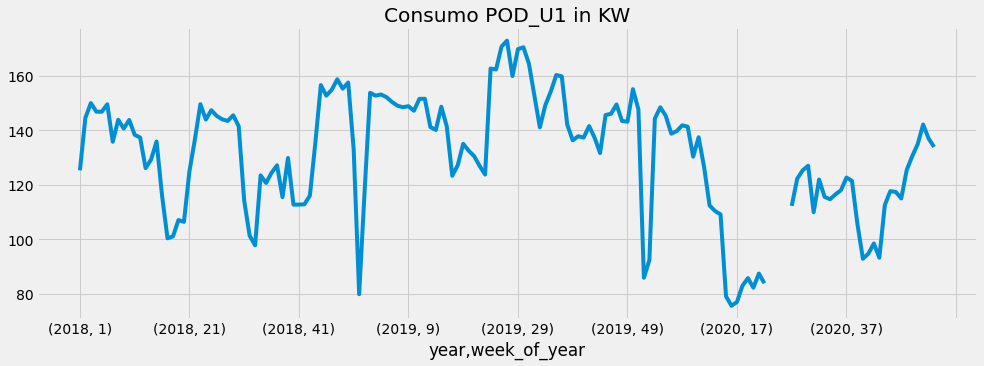

In [248]:
pod_u1_hourly.groupby(['year','week_of_year'])['CONSUMO_ATTIVA_PRELEVATA'].mean().plot(
                        style='-', 
                        figsize=(15,5), 
                        #color=color_pal[0], 
                        title='Consumo POD_U1 in KW')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


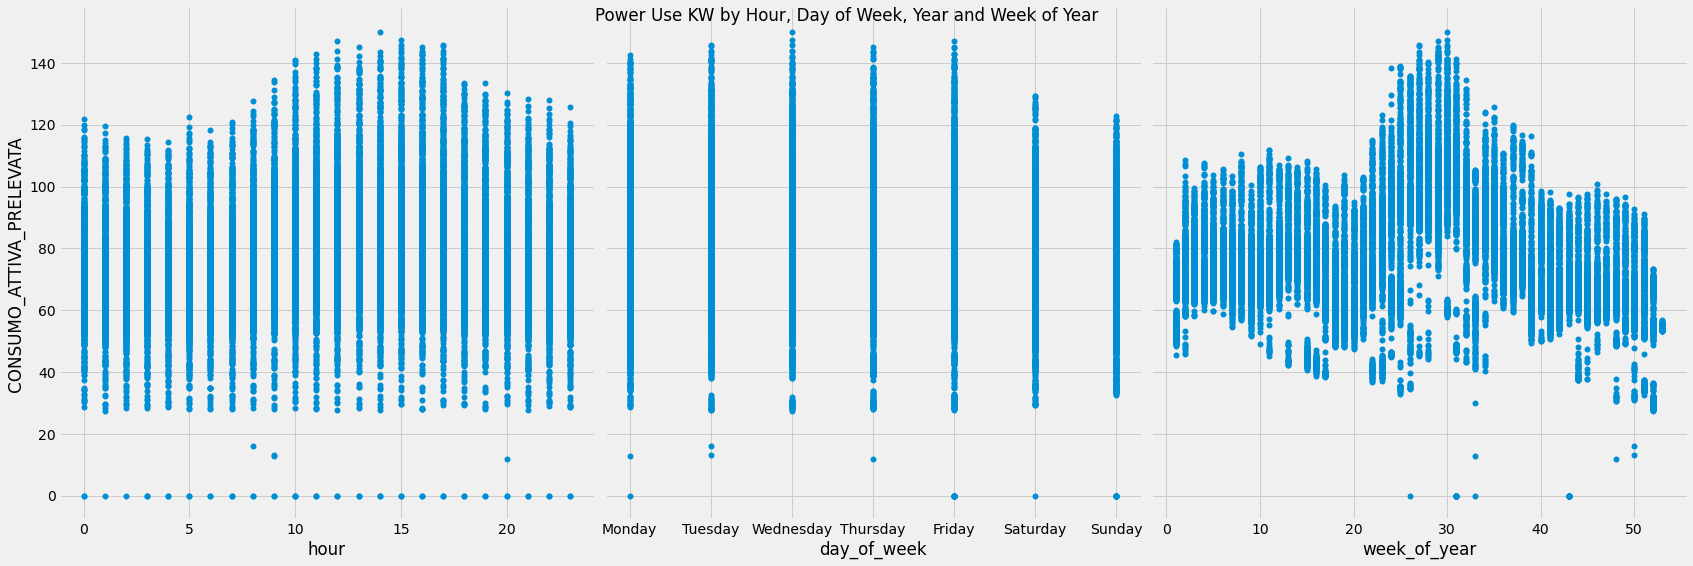

In [249]:
sns.pairplot(pod_u6_hourly,
             #hue='hour',
             x_vars=['hour','day_of_week',
                     'week_of_year'],
             y_vars='CONSUMO_ATTIVA_PRELEVATA',
             height=8, 
             #palette="husl",
             plot_kws={'alpha':1, 'linewidth':0}
            )
plt.suptitle('Power Use KW by Hour, Day of Week, Year and Week of Year')
plt.show()

In [250]:
pod_test11 = pod_u1_hourly.copy()
pod_test66 = pod_u6_hourly.copy()

In [251]:
#pod_test11.groupby(['year'])['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U1')

In [252]:
#pod_test66.groupby(['year'])['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U1')

<AxesSubplot:title={'center':'Consumo POD_U1 in KW'}, xlabel='month,day'>

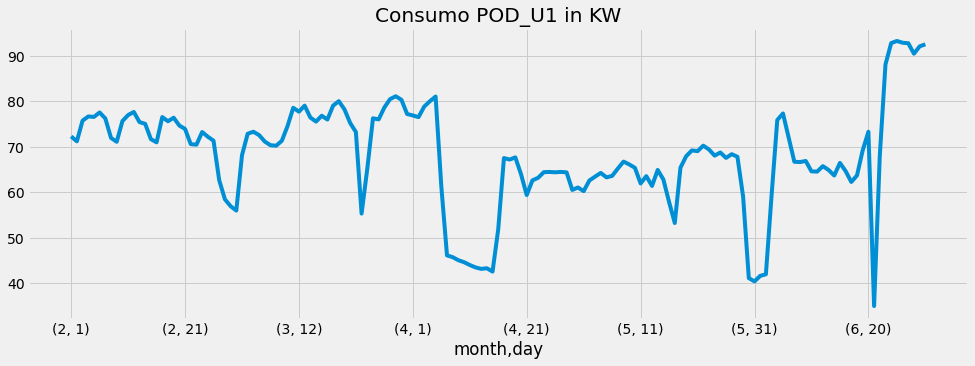

In [253]:
pod999 = pod_u6_hourly.copy()
pod999 = pod999[pod999.index >'01-Feb-2020']
pod999 = pod999[pod999.index <'01-Jul-2020']

pod999.groupby(['month','day'])['CONSUMO_ATTIVA_PRELEVATA'].mean().plot(
                        style='-', 
                        figsize=(15,5), 
                        #color=color_pal[0], 
                        title='Consumo POD_U1 in KW')

<AxesSubplot:title={'center':'POD_U1'}, xlabel='year,month'>

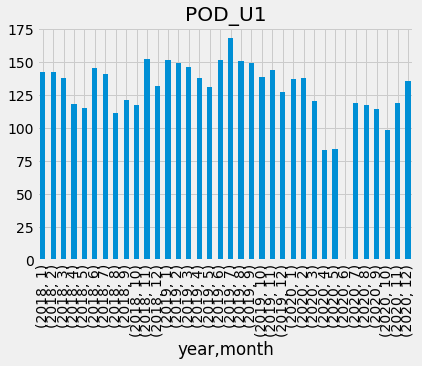

In [254]:
pod_test11.groupby(['year','month'])['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U1')

In [255]:
#pod_test11.groupby('month')['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U1')

In [256]:
#pod_test66.groupby('month')['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U6')

In [257]:
#pod_test11.groupby('day_of_week_number')['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U1')

In [258]:
#pod_test66.groupby('day_of_week_number')['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U6')

In [259]:
#pod_test11.groupby('hour')['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U6')

In [260]:
#pod_test66.groupby('hour')['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U6')

In [261]:
col_list = ['CONSUMO_ATTIVA_PRELEVATA','year', 'month', 'day', 'hour', 'day_of_week',
                      'day_of_week_number']

pod_u1_inter = pod_u1_hourly[col_list]

list_linear =[]
for i in range(24):
    pod_u1_inter1 = pod_u1_inter[pod_u1_inter['hour']==i]
    pod_u1_linear = pod_u1_inter1.interpolate(method='linear')
    list_linear.append(pod_u1_linear)

#pod_u1_spline = pod_u1_inter.interpolate(method='spline', order=2)
#pod_u1_poly = pod_u1_inter.interpolate(method='polynomial',order=2)
#pod_u6_linear = pod_u6_inter.interpolate(method='linear')
#pod_u6_spline = pod_u6_inter.interpolate(method='spline', order=2)
#pod_u6_poly = pod_u6_inter.interpolate(method='polynomial',order=2)
    

#pod_u1_linear.groupby(['year','month'])['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U1')
#pod_u1_linear[(pod_u1_inter['year']==2020)&(pod_u1_inter['month']==6)]



<AxesSubplot:title={'center':'POD_U1'}, xlabel='month,day'>

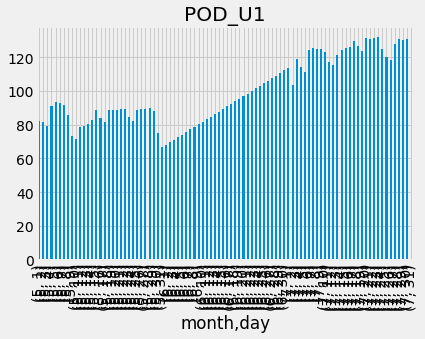

In [262]:
full_df1 = pd.concat(list_linear,ignore_index=False)
full_df1 = full_df1[(full_df1['year']==2020) & (full_df1['month']>=5) & (full_df1['month']<8)]
full_df1 = full_df1.sort_index()
full_df1.groupby(['month','day'])['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U1')

In [263]:
#test_monthly_data = pod_u1_hourly.resample('M').mean()
#test_monthly_data.shape

In [264]:
#test_monthly_data = test_monthly_data.interpolate(method='linear')
#print('linear interpolation of June 2020')
#print(test_monthly_data[(test_monthly_data['year']==2020) & (test_monthly_data['month']==6)].iloc[:,1])
#print('')
#print('let us see if we still have missing data:')
#print(test_monthly_data[test_monthly_data['CONSUMO_ATTIVA_PRELEVATA'].isna()])
#test_monthly_data.groupby(['year','month'])['CONSUMO_ATTIVA_PRELEVATA'].mean().plot.bar(title='POD_U1')

In [265]:
#we have eliminated some rows in march --> daylight savings time

In [266]:
#prova ad usare prophet

In [267]:
#esempio di forecasting con prophet

# https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet 

In [268]:
# dovrai stimare il valore medio di giugno 2020 del primo POD
#però fai attenzione alla distribuzione di giorni feriali/festivi di giugno 2020 perchè è diversa
#dalla distribuzione dei mesi precedenti

In [269]:
start_year = pod_u6_hourly.year.min()
final_year = pod_u6_hourly.year.max()

#print(start_year)
year_list = list(np.arange(start_year, final_year+1))
year_list

[2018, 2019, 2020]

In [270]:
holiday_date = []
holiday_name = []
  
# Print all the holidays in UnitedKingdom in year 2018
for ptr in holidays.IT(years = year_list, prov='MI').items():
    holiday_date.append(ptr[0])
    holiday_name.append(ptr[1])
    print(ptr)

(datetime.date(2018, 1, 1), 'Capodanno')
(datetime.date(2018, 1, 6), 'Epifania del Signore')
(datetime.date(2018, 4, 1), 'Pasqua di Resurrezione')
(datetime.date(2018, 4, 2), "Lunedì dell'Angelo")
(datetime.date(2018, 4, 25), 'Festa della Liberazione')
(datetime.date(2018, 5, 1), 'Festa dei Lavoratori')
(datetime.date(2018, 6, 2), 'Festa della Repubblica')
(datetime.date(2018, 8, 15), 'Assunzione della Vergine')
(datetime.date(2018, 11, 1), 'Tutti i Santi')
(datetime.date(2018, 12, 8), 'Immacolata Concezione')
(datetime.date(2018, 12, 25), 'Natale')
(datetime.date(2018, 12, 26), 'Santo Stefano')
(datetime.date(2018, 12, 7), "Sant'Ambrogio")
(datetime.date(2019, 1, 1), 'Capodanno')
(datetime.date(2019, 1, 6), 'Epifania del Signore')
(datetime.date(2019, 4, 21), 'Pasqua di Resurrezione')
(datetime.date(2019, 4, 22), "Lunedì dell'Angelo")
(datetime.date(2019, 4, 25), 'Festa della Liberazione')
(datetime.date(2019, 5, 1), 'Festa dei Lavoratori')
(datetime.date(2019, 6, 2), 'Festa della Rep

In [271]:
type(holiday_date[0])

datetime.date

In [272]:
d = {'date': holiday_date, 'holiday_name': holiday_name}
holiday_df = pd.DataFrame(d)
holiday_df['date'] = holiday_df['date'].apply(pd.to_datetime)
#holiday_df['year'] = holiday_df['date'].dt.year
#holiday_df['month'] = holiday_df['date'].dt.month
#holiday_df['day'] = holiday_df['date'].dt.day
#holiday_df['hour'] = holiday_df['date'].dt.hour
holiday_df = holiday_df.set_index('date')
holiday_df = holiday_df.sort_index()
holiday_df['DATA'] = holiday_df.index.strftime("%Y-%m-%d")
#holiday_df = holiday_df.asfreq('H', method='ffill')
holiday_df.head()

,holiday_name,DATA
date,,
2018-01-01,Capodanno,2018-01-01
2018-01-06,Epifania del Signore,2018-01-06
2018-04-01,Pasqua di Resurrezione,2018-04-01
2018-04-02,Lunedì dell'Angelo,2018-04-02
2018-04-25,Festa della Liberazione,2018-04-25


In [273]:
holiday_date1 = list(holiday_df['DATA'])

def feste_calendario(x):
    if x in holiday_date1:
        w = 1
    else:
        w = 0
    return w

In [274]:
pod_list1 = [pod_u1_hourly, pod_u6_hourly]

pod_list10 = []

#for i in pod_list1:
    #i.drop(columns=['DATA'], inplace=True)
    #i['DATA'] = i.index.strftime("%Y%m%d")
    #i['holiday_binary'] = i['DATA'].apply(feste_calendario)
    #i.drop(columns=['DATA'], inplace=True)
    #i.head(2)
    
for i in pod_list1:
    i['holiday_binary'] = i['DATA'].apply(feste_calendario)
    i = i.reset_index()
    w = pd.merge(i, holiday_df, how='left', on='DATA')
    w = w.set_index('date')
    pod_list10.append(w)

    
pod_u1_new = pod_list10[0]
pod_u6_new = pod_list10[1]

In [275]:
pod_u6_new.head(2)

,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,year,month,day,hour,day_of_week,day_of_week_number,week_of_year,day_of_year,DATA,holiday_binary,holiday_name
date,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1.0,64.50,22.95,446.4,2018,1,1,0,Monday,0,1,1,2018-01-01,1,Capodanno
2018-01-01 01:00:00,1.0,64.35,23.25,446.4,2018,1,1,1,Monday,0,1,1,2018-01-01,1,Capodanno


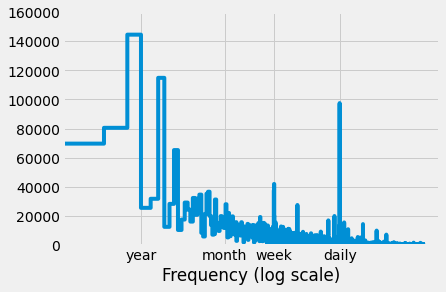

In [276]:
#fourier - frequency

df1 = pod_u6_new.copy()
fft = tf.signal.rfft(df1['CONSUMO_ATTIVA_PRELEVATA'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df1['CONSUMO_ATTIVA_PRELEVATA'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 160000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 12, 52 ,365.2524], labels=['year', 'month', 'week', 'daily'])
_ = plt.xlabel('Frequency (log scale)')

In [277]:
#esempio di forecasting con prophet

# https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet 

In [278]:
split_date = '01-Jul-2020'
split_date1 = '01-Jun-2020'
df22 = pod_u1_new.copy()
#pjme_train = pjme.loc[pjme.index <= split_date].copy()
#pjme_test = pjme.loc[pjme.index > split_date].copy()

df22 = df22.drop(df22[(df22.year == 2020) & (df22.month == 6)].index)
df22 = df22[['CONSUMO_ATTIVA_PRELEVATA']]

df22 = df22.reset_index()
df22 = df22.rename(columns={'date':'ds','CONSUMO_ATTIVA_PRELEVATA':'y'})

#df22.head(2)

model = Prophet()
model.fit(df22)


df33 = pod_u1_new.copy()
df33 = df33[(df33.index >= split_date1) & (df33.index < split_date)]
df33 = df33[['CONSUMO_ATTIVA_PRELEVATA']]
df33 = df33.reset_index()
df33 = df33.rename(columns={'date':'ds','CONSUMO_ATTIVA_PRELEVATA':'y'})
df33 = df33[['ds']]
#df33.tail()

pjme_test_fcst = model.predict(df33)
#pjme_test_fcst.head()


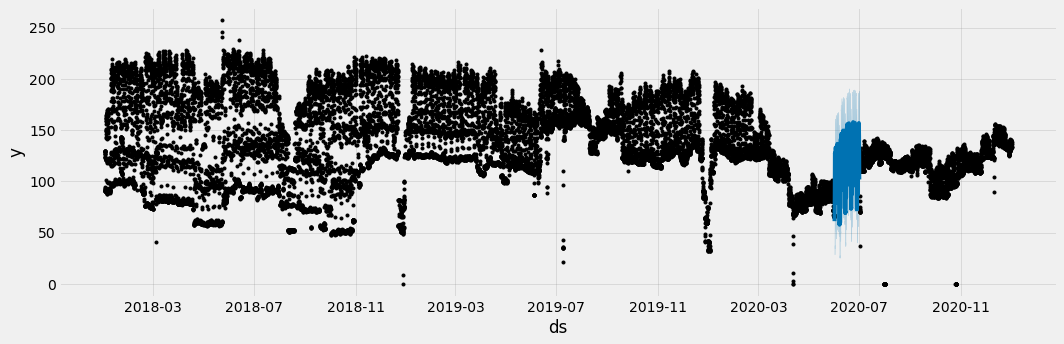

In [279]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst,
                 ax=ax)
plt.show()

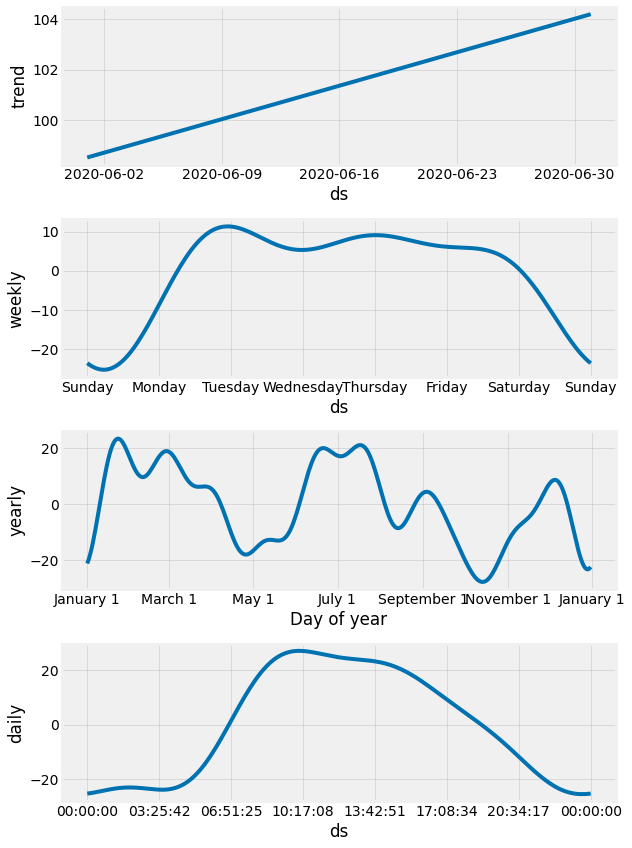

In [206]:
fig = model.plot_components(pjme_test_fcst)

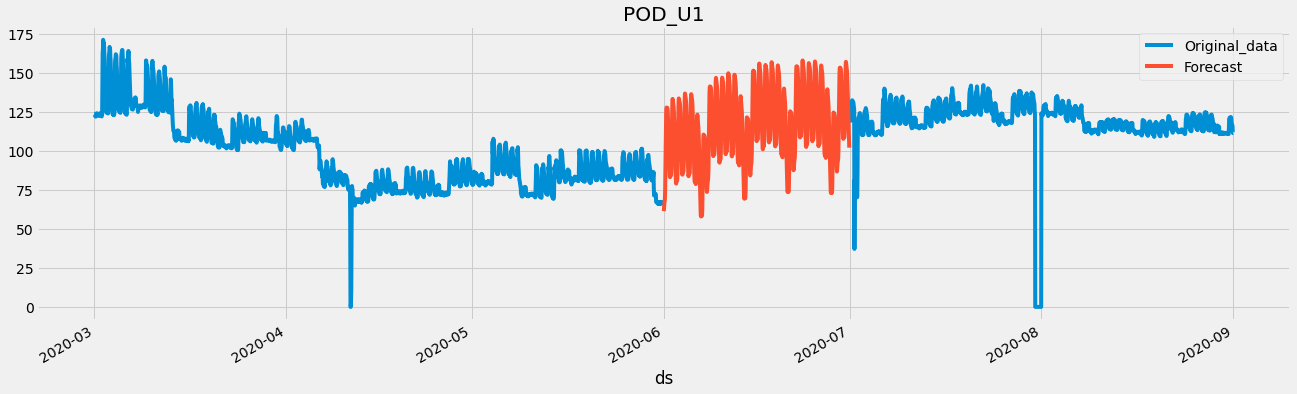

In [207]:
df44 = pjme_test_fcst[['ds','yhat']]

df44 = df44.rename(columns={'yhat':'y'})

#df555 = pd.concat([df22, df44])
#df555 = df555.set_index('ds')
#df555[(df555.index >= '01-May-2020') & (df555.index < '01-Aug-2020')].plot(figsize=(15,5))
#plt.ylim(0, 160)
#plt.show()

df_lp = df22.copy()
df_lp1 = df44.copy()

df_lp = df_lp.set_index('ds')
df_lp1 = df_lp1.set_index('ds')

df_lp = df_lp.rename(columns={'y': 'Original_data'})
df_lp1 = df_lp1.rename(columns={'y': 'Forecast'})



df_lp[(df_lp.index >= '01-Mar-2020') & (df_lp.index <= '01-Sep-2020')] \
            .join(df_lp1, how='outer') \
            .plot(figsize=(20,6), title='POD_U1', style='-')
plt.show()

In [208]:
holiday_df0 = pod_u1_new[['holiday_name']].copy()
holiday_df0 = holiday_df0[holiday_df0['holiday_name'] \
                    .isna()==False] \
                    .reset_index() \
                    .rename(columns={'date':'ds', 'holiday_name':'holiday'})
holiday_df0['ds'] = pd.to_datetime(holiday_df0['ds'])
holiday_df0.head()

,ds,holiday
0,2018-01-01 00:00:00,Capodanno
1,2018-01-01 01:00:00,Capodanno
2,2018-01-01 02:00:00,Capodanno
3,2018-01-01 03:00:00,Capodanno
4,2018-01-01 04:00:00,Capodanno


In [209]:
#let's run prophet model with holidays (02-Jun-2020)

split_date = '01-Jul-2020'
split_date1 = '01-Jun-2020'
df22 = pod_u1_new.copy()
#pjme_train = pjme.loc[pjme.index <= split_date].copy()
#pjme_test = pjme.loc[pjme.index > split_date].copy()

df22 = df22.drop(df22[(df22.year == 2020) & (df22.month == 6)].index)
df22 = df22[['CONSUMO_ATTIVA_PRELEVATA']]

df22 = df22.reset_index()
df22 = df22.rename(columns={'date':'ds','CONSUMO_ATTIVA_PRELEVATA':'y'})

#df22.head(2)

model = Prophet(holidays=holiday_df0)
model.fit(df22)


df33 = pod_u1_new.copy()
df33 = df33[(df33.index >= split_date1) & (df33.index < split_date)]
df33 = df33[['CONSUMO_ATTIVA_PRELEVATA']]
df33 = df33.reset_index()
df33 = df33.rename(columns={'date':'ds','CONSUMO_ATTIVA_PRELEVATA':'y'})
df33 = df33[['ds']]
#df33.tail()

pjme_test_fcst_hol = model.predict(df33)
#pjme_test_fcst.head()



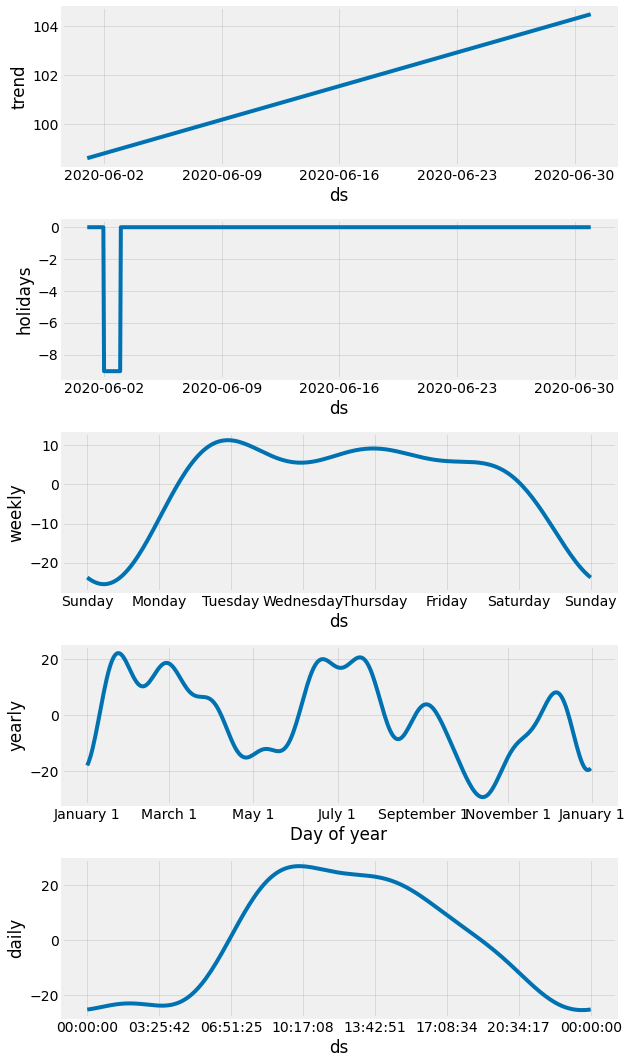

In [210]:
fig = model.plot_components(pjme_test_fcst_hol)

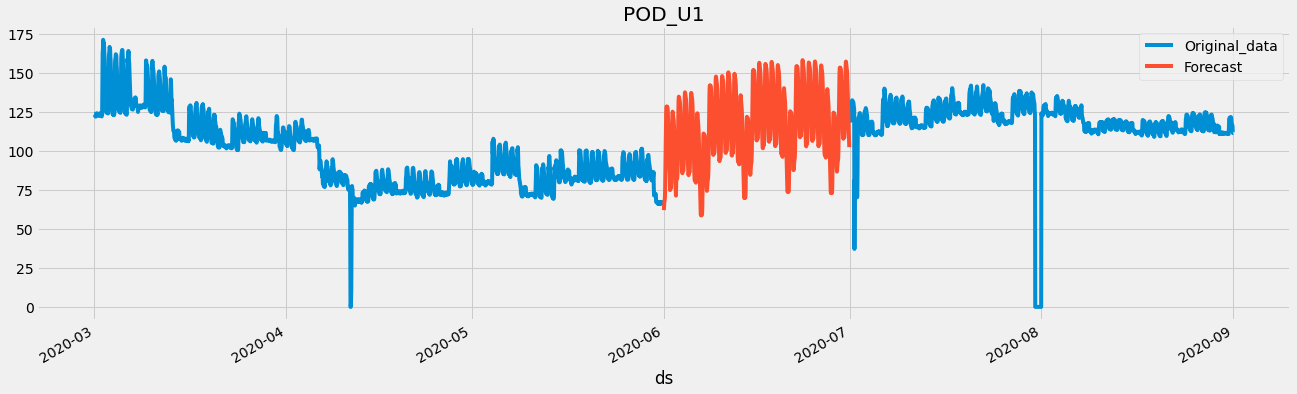

In [211]:
df44_hol = pjme_test_fcst_hol[['ds','yhat']]

df44_hol = df44_hol.rename(columns={'yhat':'y'})

#df555_hol = pd.concat([df22, df44_hol])
#df555_hol = df555_hol.set_index('ds')
#df555_hol[(df555_hol.index >= '01-May-2020') & (df555.index < '01-Aug-2020')].plot(figsize=(15,5))
#plt.ylim(0, 160)
#plt.show()

df_lp = df22.copy()
df_lp1_hol = df44_hol.copy()

df_lp = df_lp.set_index('ds')
df_lp1_hol = df_lp1_hol.set_index('ds')

df_lp = df_lp.rename(columns={'y': 'Original_data'})
df_lp1_hol = df_lp1_hol.rename(columns={'y': 'Forecast'})



df_lp[(df_lp.index >= '01-Mar-2020') & (df_lp.index <= '01-Sep-2020')] \
            .join(df_lp1_hol, how='outer') \
            .plot(figsize=(20,6), title='POD_U1', style='-')
plt.show()

In [212]:
df_lp1[df_lp1.index == '02-Jun-2020'].mean()  #forecast by prophet

Forecast    83.062362
dtype: float64

In [213]:
df_lp1_hol[df_lp1_hol.index == '02-Jun-2020'].mean()  #forecast by prophet with holidays (02-Jun-2020)

Forecast    74.794596
dtype: float64

In [214]:
#complete time series - POD U1

In [215]:
df555_hol = pd.concat([df22, df44_hol])
#df555_hol = df555_hol.set_index('ds').sort_index()
df555_hol['ds'] = pd.to_datetime(df555_hol['ds'])

df555_hol = df555_hol.rename(columns={'ds':'date'}) \
                .set_index('date') \
                .sort_index()



In [216]:
new_data = df555_hol.copy()

new_data.head()

,y
date,
2018-01-01 00:00:00,91.7125
2018-01-01 01:00:00,91.1625
2018-01-01 02:00:00,90.7500
2018-01-01 03:00:00,93.5000
2018-01-01 04:00:00,123.6125


In [217]:
new_data_pod_u1 = pd.concat([pod_u1_new, new_data], axis=1)
new_data_pod_u1[new_data_pod_u1.DATA == '2020-06-01'].head()

,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,year,month,day,hour,day_of_week,day_of_week_number,week_of_year,day_of_year,DATA,holiday_binary,holiday_name,y
date,,,,,,,,,,,,,,,,
2020-06-01 00:00:00,NaN,NaN,NaN,NaN,2020,6,1,0,Monday,0,23,153,2020-06-01,0,NaN,61.973911
2020-06-01 01:00:00,NaN,NaN,NaN,NaN,2020,6,1,1,Monday,0,23,153,2020-06-01,0,NaN,64.922533
2020-06-01 02:00:00,NaN,NaN,NaN,NaN,2020,6,1,2,Monday,0,23,153,2020-06-01,0,NaN,67.271581
2020-06-01 03:00:00,NaN,NaN,NaN,NaN,2020,6,1,3,Monday,0,23,153,2020-06-01,0,NaN,68.222140
2020-06-01 04:00:00,NaN,NaN,NaN,NaN,2020,6,1,4,Monday,0,23,153,2020-06-01,0,NaN,69.737968


In [218]:
new_data_pod_u1['check'] = new_data_pod_u1['y'] - new_data_pod_u1['CONSUMO_ATTIVA_PRELEVATA']
print(list(new_data_pod_u1.check.unique()))  #valori della colonna "Check"

[0.0, nan]


In [219]:
reference_col_list = list(pod_u6_new.columns)

In [220]:
reference_col_list1 = reference_col_list
reference_col_list1[1] = 'y'
reference_col_list1

['FL_ORA_LEGALE',
 'y',
 'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA',
 'POTENZA_MASSIMA',
 'year',
 'month',
 'day',
 'hour',
 'day_of_week',
 'day_of_week_number',
 'week_of_year',
 'day_of_year',
 'DATA',
 'holiday_binary',
 'holiday_name']

In [221]:
pod_u1_new = new_data_pod_u1.copy()
pod_u1_new = pod_u1_new[reference_col_list1]
pod_u1_new = pod_u1_new.rename(columns={'y':'CONSUMO_ATTIVA_PRELEVA'})

pod_u1_new.head(2)

,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,year,month,day,hour,day_of_week,day_of_week_number,week_of_year,day_of_year,DATA,holiday_binary,holiday_name
date,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1.0,91.7125,36.4375,888.8,2018,1,1,0,Monday,0,1,1,2018-01-01,1,Capodanno
2018-01-01 01:00:00,1.0,91.1625,36.5750,888.8,2018,1,1,1,Monday,0,1,1,2018-01-01,1,Capodanno


In [222]:
pod_u1_new[pod_u1_new.CONSUMO_ATTIVA_PRELEVA.isna()==True]

,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,year,month,day,hour,day_of_week,day_of_week_number,week_of_year,day_of_year,DATA,holiday_binary,holiday_name
date,,,,,,,,,,,,,,,


In [223]:
len(pod_u1_new) == len(pod_u6_new)

True

In [224]:
pod_u1_new.shape == pod_u6_new.shape

True

In [225]:
print('i due dataframe finali sono: ')
print('')
print('pod_u1_new')
print('pod_u6_new')

i due dataframe finali sono: 

pod_u1_new
pod_u6_new


In [226]:
#valuta se eliminare gli outliers (quando il carico è pari a 0 KW)

In [227]:
#probabilmente quando il carico è uguale a 0 KW, ci sono stati degli interventi di manutenzione sulla rete da parte del distributore o sull'impianto